# Initial Work into Multi-Armed Bandits

## Explore-First

In [1]:
import sys
import os

module_path = os.path.abspath(os.path.join('../'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
from src.bandits import RandomizedStochasticBandit
from src.agents import ExploreExploit, EpsGreedy, UCB
from src.arms import UniformArm

import numpy as np

import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

mpl.rcParams['figure.dpi'] = 300

In [3]:
K = 10
T = 1000

arm_factory = UniformArm.factory()
bandit = RandomizedStochasticBandit(5, arm_factory)
agent = ExploreExploit(bandit, K, T)

Multi-Armed Bandit Problem
 K=5
 mu_star = 0.6648133695273769
 a_star  = 4

Uniform Arm mu 0.3943216906037219, R in [0.15864061971522453, 0.6300027614922193]
Uniform Arm mu 0.2607977615555492, R in [0.0337656148716432, 0.48782990823945516]
Uniform Arm mu 0.5386082239462484, R in [0.47790200037317193, 0.5993144475193248]
Uniform Arm mu 0.5945393744723816, R in [0.31746254117562894, 0.8716162077691343]
Uniform Arm mu 0.6648133695273769, R in [0.4995776301880588, 0.830049108866695]


In [4]:
def run_agent(agent, title):
    rs = []
    crs = []
    ats = []

    while not agent.terminated():
        reward, cum_reward, a_t = agent.step()
        rs.append(reward)
        crs.append(cum_reward)
        ats.append(a_t)
    
    plt.figure(figsize=(10, 10))
    plt.subplot(3, 1, 1)
    plt.plot(rs)
    plt.title("Explore-Exploit")
    plt.xlabel("Step")
    plt.ylabel("$r_t$")

    plt.subplot(3, 1, 2)
    plt.plot(crs)
    plt.xlabel("Step")
    plt.ylabel("Real. Regret")

    plt.subplot(3, 1, 3)
    plt.plot(ats)
    plt.xlabel("Step");
    plt.ylabel("Action Taken");

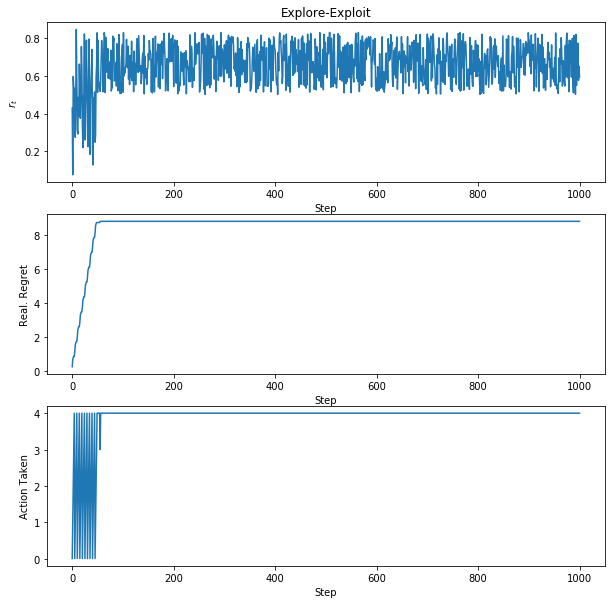

In [5]:
run_agent(agent, "Explore-First")

## Epsilon Greedy

Multi-Armed Bandit Problem
 K=5
 mu_star = 0.6648133695273769
 a_star  = 4

Uniform Arm mu 0.3943216906037219, R in [0.15864061971522453, 0.6300027614922193]
Uniform Arm mu 0.2607977615555492, R in [0.0337656148716432, 0.48782990823945516]
Uniform Arm mu 0.5386082239462484, R in [0.47790200037317193, 0.5993144475193248]
Uniform Arm mu 0.5945393744723816, R in [0.31746254117562894, 0.8716162077691343]
Uniform Arm mu 0.6648133695273769, R in [0.4995776301880588, 0.830049108866695]


/Users/mrinank/.local/share/virtualenvs/DP-PVI-5hC-ICo8/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/mrinank/.local/share/virtualenvs/DP-PVI-5hC-ICo8/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


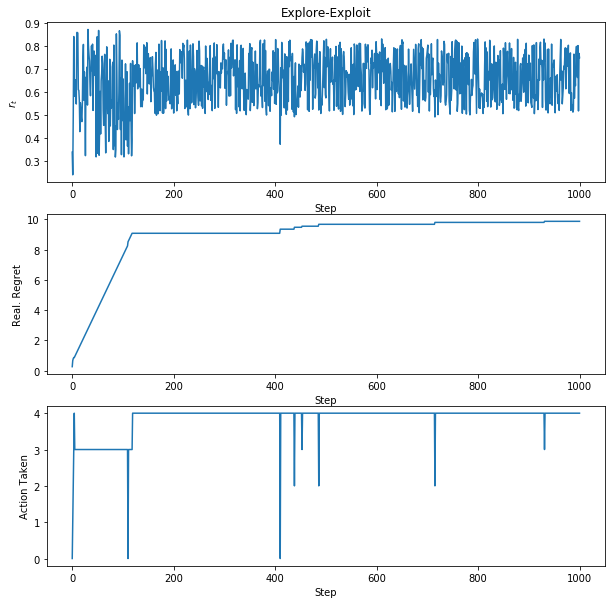

In [6]:
eps = 0.01
T = 1000

bandit.reset()
agent = EpsGreedy(bandit, eps, T)
run_agent(agent, "Eps Greedy")

Multi-Armed Bandit Problem
 K=5
 mu_star = 0.6648133695273769
 a_star  = 4

Uniform Arm mu 0.3943216906037219, R in [0.15864061971522453, 0.6300027614922193]
Uniform Arm mu 0.2607977615555492, R in [0.0337656148716432, 0.48782990823945516]
Uniform Arm mu 0.5386082239462484, R in [0.47790200037317193, 0.5993144475193248]
Uniform Arm mu 0.5945393744723816, R in [0.31746254117562894, 0.8716162077691343]
Uniform Arm mu 0.6648133695273769, R in [0.4995776301880588, 0.830049108866695]


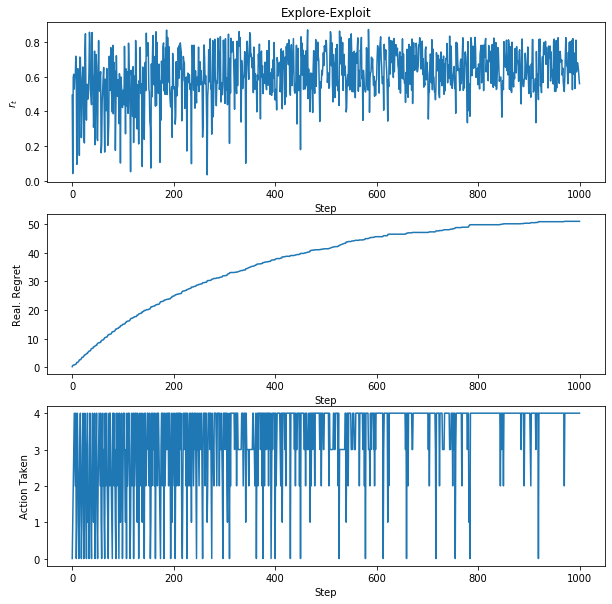

In [7]:
T = 1000

bandit.reset()
agent = UCB(bandit, T)
run_agent(agent, "UCB")